Libraries

In [ ]:
import io
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import shutil
import pickle as pk
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


Import data

In [ ]:
from google.colab import drive
drive.mount('./mount')

folder_path = '/content/mount/MyDrive/Colab Notebooks/Dissertation/k prediction/'
readDataset_name = 'k_458.csv'
dataset_path = folder_path + readDataset_name
df = pd.read_csv(dataset_path, header=0)
print(df)

Mounted at ./mount
                   bc_id bc_type bc_modif1 bc_modif2  bc_temp  bc_time  \
0             Swine bone    Bone  Pristine  Pristine      900      2.0   
1             Swine bone    Bone      Acid  Pristine      900      2.0   
2            Wheat straw   Plant  Pristine  Pristine      700      2.0   
3            Wheat straw   Plant      Acid  Pristine      700      2.0   
4       Municipal sludge  Sludge  Pristine  Pristine      700      2.0   
..                   ...     ...       ...       ...      ...      ...   
452         Fe sludge BC  Sludge     Metal  Pristine      700      2.0   
453            Sludge BC  Sludge  Pristine  Pristine      600      4.0   
454            Sludge BC  Sludge  Pristine  Pristine      800      4.0   
455  Activated sludge BC  Sludge      Acid      Acid      600      4.0   
456  Activated sludge BC  Sludge      Acid      Acid      800      4.0   

     bc_rate     bc_oc   bc_ssa  bc_idig  ...  oxi_srp  oxi_bde  oxi_pka  \
0          5  0.

In [ ]:
#convert

print(df['bc_type'].unique())
print(df['bc_modif1'].unique())
print(df['bc_modif2'].unique())

['Bone' 'Plant' 'Sludge' 'Algae']
['Pristine' 'Acid' 'Metal' 'Heteroatom' 'Basic']
['Pristine' 'Heteroatom' 'Metal' 'Acid' 'Basic']


In [ ]:
target='bc_ssa'
type_mean_target_encoded=df.groupby('bc_type')[target].mean()
df['bc_type_encoded']=df['bc_type'].map(type_mean_target_encoded)
df[['bc_type','bc_type_encoded']].head(20)

,bc_type,bc_type_encoded
0,Bone,248.257656
1,Bone,248.257656
2,Plant,335.052536
3,Plant,335.052536
4,Sludge,110.019383
5,Sludge,110.019383
6,Bone,248.257656
7,Bone,248.257656
8,Bone,248.257656
9,Bone,248.257656


In [ ]:
target='bc_ssa'
modif1_mean_target_encoded=df.groupby('bc_modif1')[target].mean()
df['bc_modif1_encoded']=df['bc_modif1'].map(modif1_mean_target_encoded)
df[['bc_modif1','bc_modif1_encoded']].head(20)

,bc_modif1,bc_modif1_encoded
0,Pristine,165.909230
1,Acid,307.205662
2,Pristine,165.909230
3,Acid,307.205662
4,Pristine,165.909230
5,Acid,307.205662
6,Acid,307.205662
7,Acid,307.205662
8,Acid,307.205662
9,Acid,307.205662


In [ ]:
target='bc_ssa'
modif2_mean_target_encoded=df.groupby('bc_modif2')[target].mean()
df['bc_modif2_encoded']=df['bc_modif2'].map(modif2_mean_target_encoded)
df[['bc_modif2','bc_modif2_encoded']].head(20)

,bc_modif2,bc_modif2_encoded
0,Pristine,201.858128
1,Pristine,201.858128
2,Pristine,201.858128
3,Pristine,201.858128
4,Pristine,201.858128
5,Pristine,201.858128
6,Pristine,201.858128
7,Pristine,201.858128
8,Pristine,201.858128
9,Pristine,201.858128


#Prediction

In [ ]:
# Define the column to stratify
stratify_column = 'k'

In [ ]:
quantiles = pd.qcut(df[stratify_column], q=3, labels=False, duplicates='drop')

In [ ]:
#split var and target
target=['k']
features=['bc_type_encoded','bc_modif1_encoded', 'bc_modif2_encoded', 'bc_temp', 'bc_time', 'bc_rate', 'bc_oc', 'bc_ssa', 'bc_idig', 'bc_co', 'bc_loading', 'oxi_bde', 'oxi_loading', 'op_mw', 'op_kow', 'op_pka', 'op_conc', 'ph']

x=df[features].values
y=df[target].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=quantiles, random_state=109)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(374, 18)
(83, 18)


In [ ]:
#scaling
sc=StandardScaler()

scaler = sc.fit(x_train)

xtrain_scaled = scaler.transform(x_train)
xtest_scaled = scaler.transform(x_test)

In [ ]:
import xgboost as xgb

In [ ]:
%%time

xgbr = xgb.XGBRegressor(learning_rate =0.1,
 n_estimators=1000,
 max_depth=8,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=8,
 scale_pos_weight=1,
 seed=27, verbosity=0)
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None, nthread=8,
             num_parallel_tree=None, ...)
CPU times: user 1.77 ms, sys: 2.12 ms, total: 3.9 ms
Wall time: 9.31 ms


In [ ]:
%%time

xgbr.fit(xtrain_scaled, y_train)

CPU times: user 2.78 s, sys: 1.76 s, total: 4.54 s
Wall time: 6.57 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None, nthread=8,
             num_parallel_tree=None, ...)

In [ ]:
%%time

score = xgbr.score(xtrain_scaled, y_train)
scores = cross_val_score(xgbr, xtrain_scaled, y_train, cv=5)
kfold = KFold(n_splits=5, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain_scaled, y_train, cv=kfold)

print("Training score: ", score)
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-Fold CV average score: %.2f" % kf_cv_scores.mean())

y_pred = xgbr.predict(xtest_scaled)
mse = mean_squared_error(y_test, y_pred)
print("RMSE: %.2f" % (mse**(1/2.0)))

Training score:  0.9990975619755025
Mean cross-validation score: 0.27
K-Fold CV average score: 0.46
RMSE: 0.07
CPU times: user 22.5 s, sys: 14.4 s, total: 36.9 s
Wall time: 30.4 s


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Coefficient of determination:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.04358070065416811
Mean Squared Error: 0.005531179155038761
Root Mean Squared Error: 0.07437189761622841
Mean Absolute Percentage Error: 2.4013404513933847
Coefficient of determination: 0.9551707016351105


In [ ]:
df_y_test = pd.DataFrame(y_test)
df_y_pred = pd.DataFrame(y_pred)

df_y_test.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_y_test, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

,Actual,Predicted
0,0.0017,0.032945
1,0.0072,0.000417
2,0.1430,0.245036
3,0.0213,0.024221
4,0.0090,0.033169
...,...,...
78,0.0350,0.077300
79,0.1295,0.103855
80,0.0228,0.137847
81,0.1716,0.036372


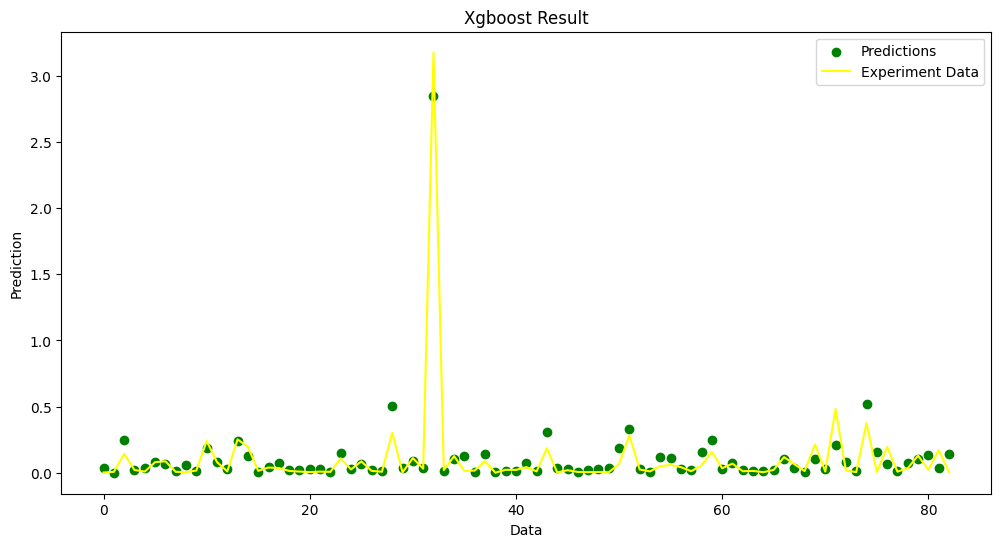

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_pred)), y_pred,color = 'green', label= 'Predictions')
plt.plot(range(len(y_test)), y_test,color = 'yellow', label= 'Experiment Data')
plt.title('Xgboost Result')
plt.ylabel('Prediction')
plt.xlabel('Data')
plt.legend()
plt.show()

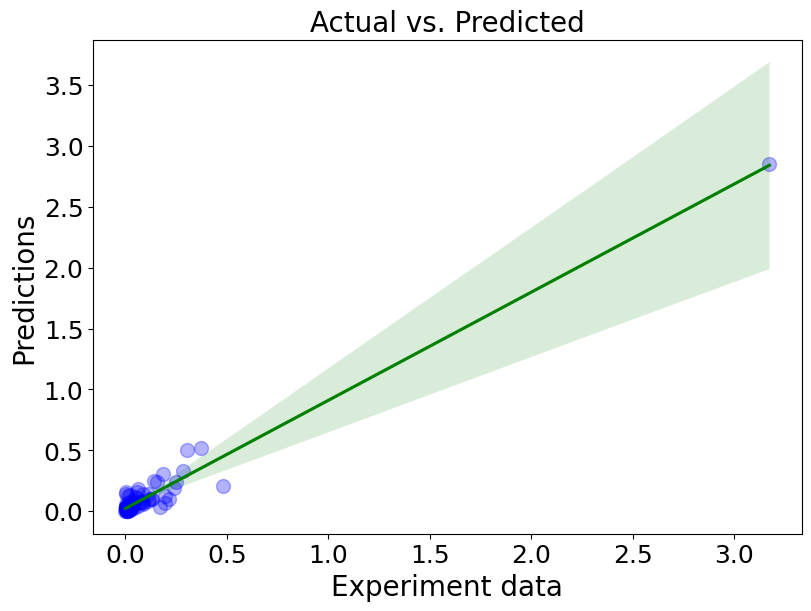

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
sns.regplot(x=df_y_test, y=df_y_pred, ax=ax, color='green', scatter_kws={"fc":"b", "ec":"b", "s":100, "alpha":0.3})
ax.set_xlabel("Experiment data", fontsize = 20)
ax.set_ylabel("Predictions", fontsize = 20)
plt.title('Actual vs. Predicted', fontsize = 20)
plt.xticks(size=18)
plt.yticks(size=18)


fig.savefig("103_snsreglmplot_01.png")

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.3 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
print(shap.__version__)

0.43.0


[04:30:08] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[04:30:09] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


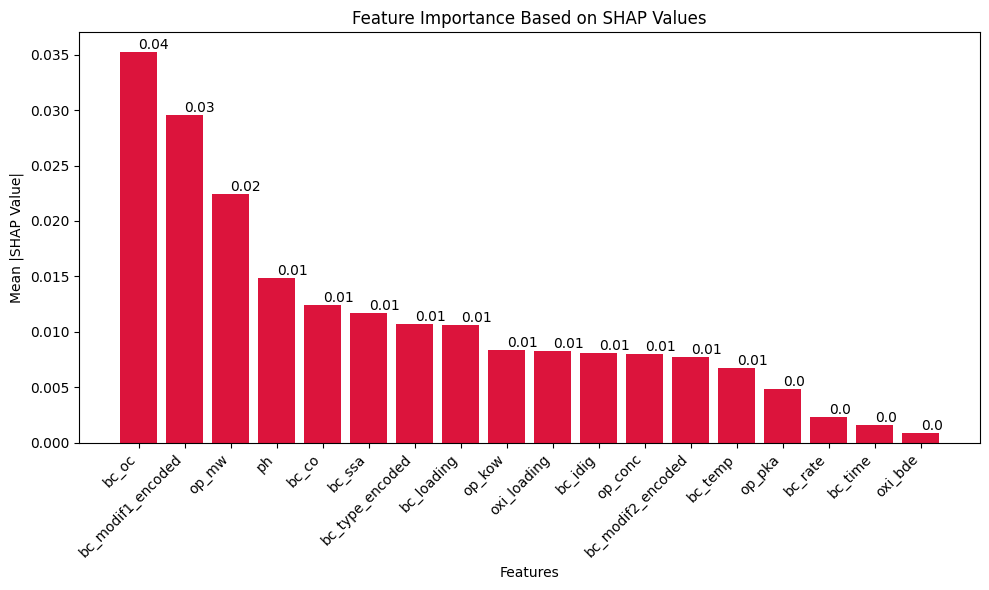

In [ ]:
# Create an explainer
explainer = shap.Explainer(xgbr)

# Calculate SHAP values for the training data
shap_values = explainer.shap_values(xtrain_scaled)

# Calculate the mean absolute SHAP values for each feature
shap_sum = np.abs(shap_values).mean(axis=0)

# Create a sorted series of the features
feature_importance = pd.Series(shap_sum, index=features).sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(feature_importance.index, feature_importance.values, color='crimson')

# Add the SHAP values as labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # Adjust alignment as necessary

# Improve plot aesthetics
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Mean |SHAP Value|')
plt.title('Feature Importance Based on SHAP Values')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Convert the mean absolute SHAP values to a DataFrame
shap_values_df = pd.DataFrame({
    'Feature': feature_importance.index,
    'Mean |SHAP Value|': feature_importance.values
})

# Display the DataFrame
print(shap_values_df)


              Feature  Mean |SHAP Value|
0               bc_oc           0.035259
1   bc_modif1_encoded           0.029551
2               op_mw           0.022462
3                  ph           0.014820
4               bc_co           0.012416
5              bc_ssa           0.011725
6     bc_type_encoded           0.010716
7          bc_loading           0.010655
8              op_kow           0.008341
9         oxi_loading           0.008285
10            bc_idig           0.008069
11            op_conc           0.007970
12  bc_modif2_encoded           0.007693
13            bc_temp           0.006749
14             op_pka           0.004863
15            bc_rate           0.002318
16            bc_time           0.001568
17            oxi_bde           0.000860


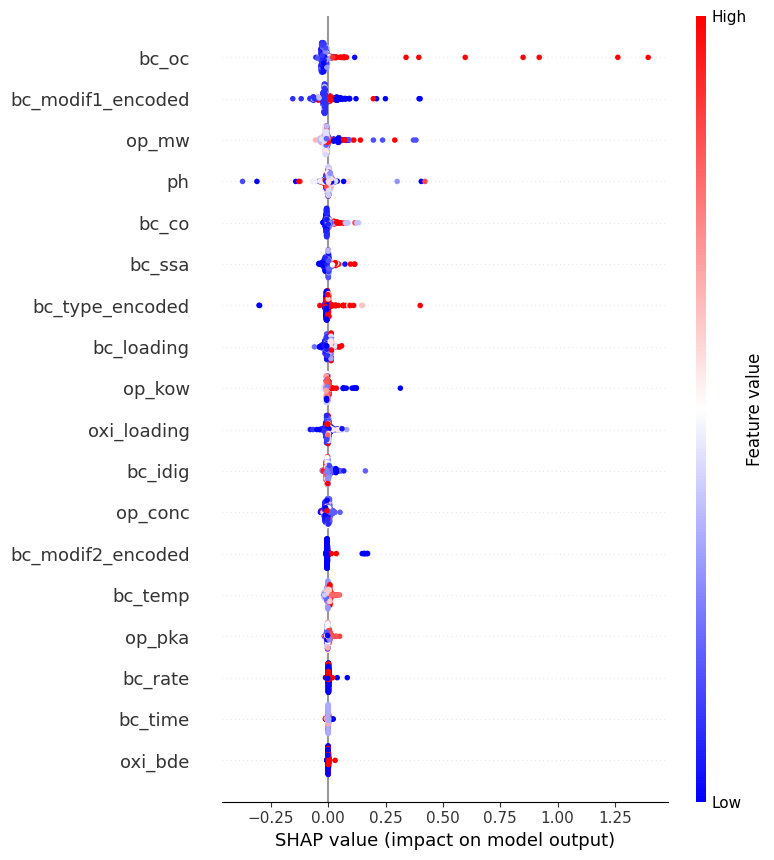

In [ ]:
# SHAP Beeswarm Plot
shap.summary_plot(shap_values, xtrain_scaled, feature_names=features, cmap='bwr')
plt.show()

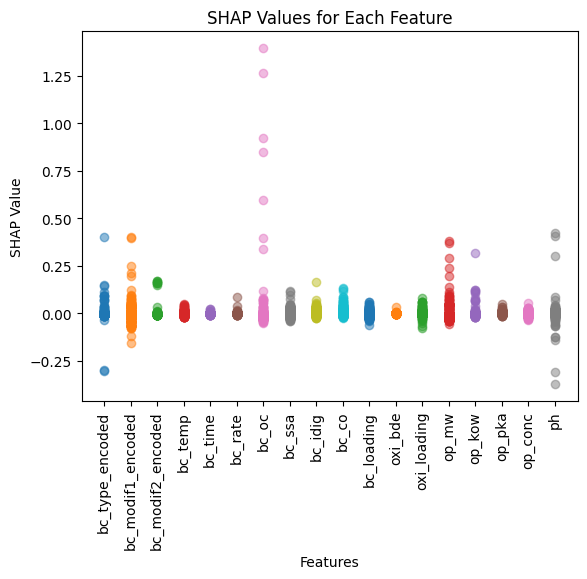

In [ ]:
# Assuming 'shap_values', 'xtrain_scaled', and 'features' are already defined

# Convert the SHAP values to a numpy array if they aren't already
shap_values_array = np.array(shap_values)

# Create a custom plot
fig, ax = plt.subplots()

# Number of features
num_features = shap_values_array.shape[1]

# Iterate over each feature
for i in range(num_features):
    # Plot the SHAP values for each feature
    ax.scatter([i] * len(shap_values_array), shap_values_array[:, i], alpha=0.5)

# Set the x-ticks to correspond to feature names
ax.set_xticks(range(num_features))
ax.set_xticklabels(features, rotation=90)

# Set labels and title (optional)
ax.set_xlabel('Features')
ax.set_ylabel('SHAP Value')
ax.set_title('SHAP Values for Each Feature')

# Show the plot
plt.show()


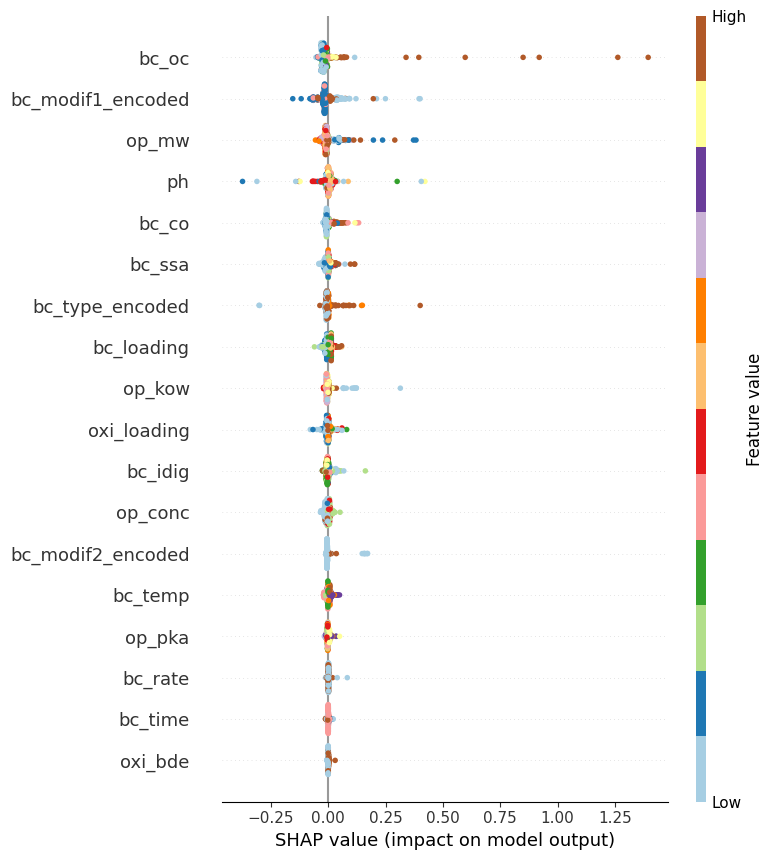

In [ ]:
# SHAP Beeswarm Plot
shap.summary_plot(shap_values, xtrain_scaled, feature_names=features, cmap='Paired')
plt.show()

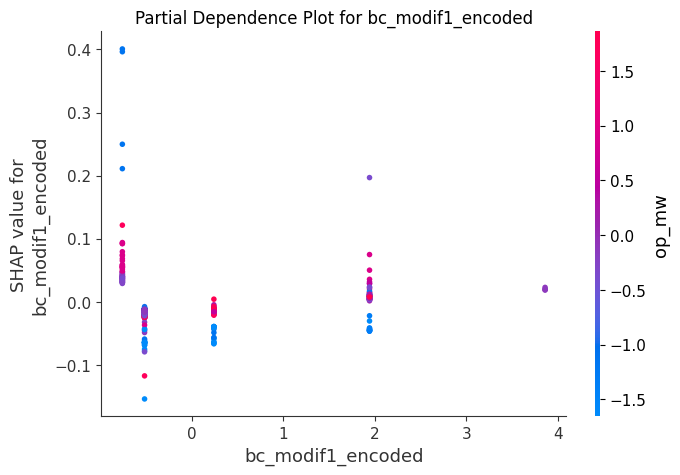

In [ ]:
# Specify the feature for which you want to create a PDP
feature_of_interest = 'bc_modif1_encoded'

# Get the index of the feature in the feature_names list
feature_index = features.index(feature_of_interest)

# Create the PDP
shap.dependence_plot(
    ind=feature_index,  # Index of the feature of interest
    shap_values=shap_values,
    features=xtrain_scaled,
    feature_names=features,
    show=False  # Set to True if you want to display the plot immediately
)

plt.title(f'Partial Dependence Plot for {feature_of_interest}')
plt.show()

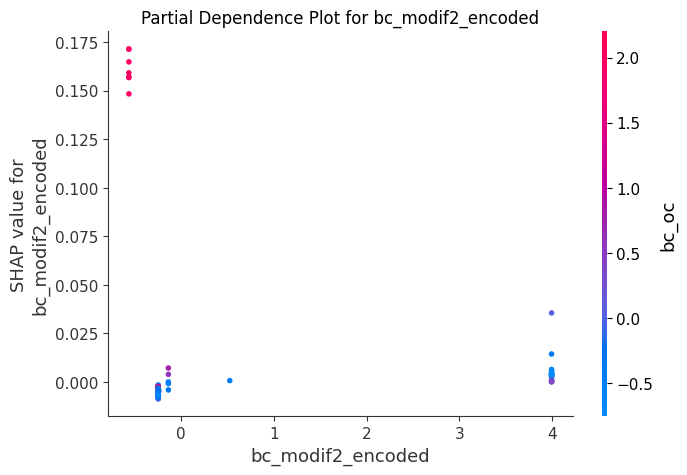

In [ ]:
# Specify the feature for which you want to create a PDP
feature_of_interest = 'bc_modif2_encoded'

# Get the index of the feature in the feature_names list
feature_index = features.index(feature_of_interest)

# Create the PDP
shap.dependence_plot(
    ind=feature_index,  # Index of the feature of interest
    shap_values=shap_values,
    features=xtrain_scaled,
    feature_names=features,
    show=False  # Set to True if you want to display the plot immediately
)

plt.title(f'Partial Dependence Plot for {feature_of_interest}')
plt.show()

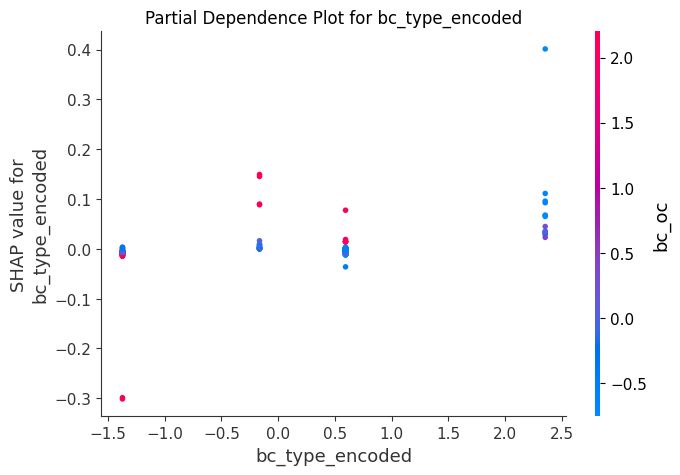

In [ ]:
# Specify the feature for which you want to create a PDP
feature_of_interest = 'bc_type_encoded'

# Get the index of the feature in the feature_names list
feature_index = features.index(feature_of_interest)

# Create the PDP
shap.dependence_plot(
    ind=feature_index,  # Index of the feature of interest
    shap_values=shap_values,
    features=xtrain_scaled,
    feature_names=features,
    show=False  # Set to True if you want to display the plot immediately
)

plt.title(f'Partial Dependence Plot for {feature_of_interest}')
plt.show()

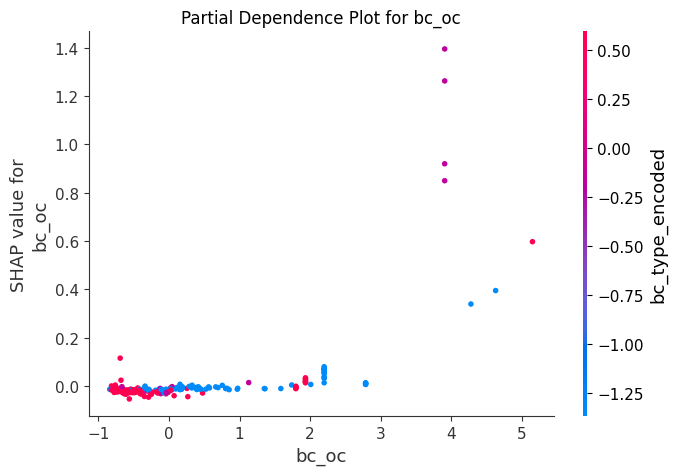

In [ ]:
# Specify the feature for which you want to create a PDP
feature_of_interest = 'bc_oc'

# Get the index of the feature in the feature_names list
feature_index = features.index(feature_of_interest)

# Create the PDP
shap.dependence_plot(
    ind=feature_index,  # Index of the feature of interest
    shap_values=shap_values,
    features=xtrain_scaled,
    feature_names=features,
    show=False  # Set to True if you want to display the plot immediately
)

plt.title(f'Partial Dependence Plot for {feature_of_interest}')
plt.show()

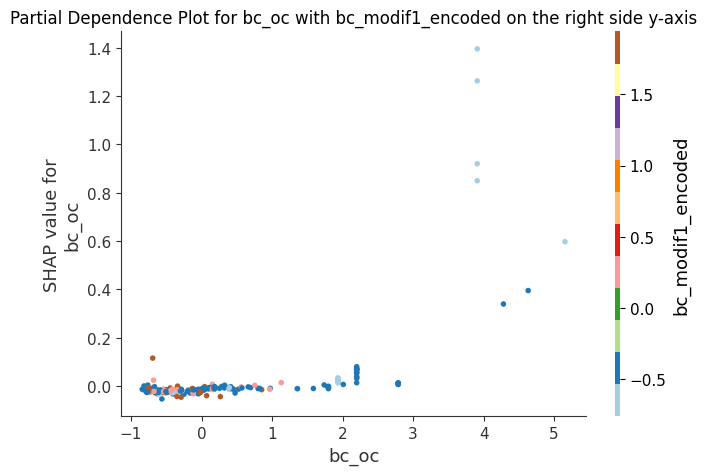

In [ ]:
# Specify the feature for which you want to create a PDP
feature_of_interest = 'bc_oc'
other_feature = 'bc_modif1_encoded'  # Change 'other_feature' to the desired feature

# Get the index of the features in the feature_names list
feature_index = features.index(feature_of_interest)
other_feature_index = features.index(other_feature)

# Set the color for the plot (e.g., 'blue', 'red', 'green', etc.)
line_color = 'red'

# Create the PDP
shap.dependence_plot(
    ind=feature_index,  # Index of the feature of interest
    shap_values=shap_values,
    features=xtrain_scaled,
    feature_names=features,
    interaction_index=other_feature_index,  # Specify the interaction feature
    show=False,  # Set to True if you want to display the plot immediately
    color=line_color,  # Specify the color of the main line
    cmap='Paired'
)

plt.title(f'Partial Dependence Plot for {feature_of_interest} with {other_feature} on the right side y-axis')
plt.show()


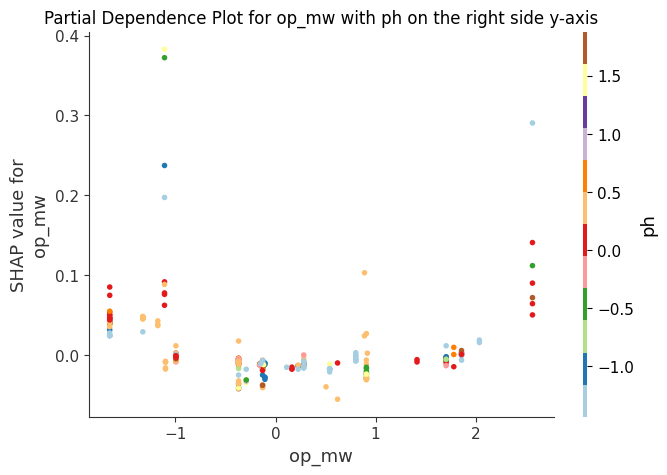

In [ ]:
# Specify the feature for which you want to create a PDP
feature_of_interest = 'op_mw'
other_feature = 'ph'  # Change 'other_feature' to the desired feature

# Get the index of the features in the feature_names list
feature_index = features.index(feature_of_interest)
other_feature_index = features.index(other_feature)

# Set the color for the plot (e.g., 'blue', 'red', 'green', etc.)
line_color = 'red'

# Create the PDP
shap.dependence_plot(
    ind=feature_index,  # Index of the feature of interest
    shap_values=shap_values,
    features=xtrain_scaled,
    feature_names=features,
    interaction_index=other_feature_index,  # Specify the interaction feature
    show=False,  # Set to True if you want to display the plot immediately
    color=line_color,  # Specify the color of the main line
    cmap='Paired'
)

plt.title(f'Partial Dependence Plot for {feature_of_interest} with {other_feature} on the right side y-axis')
plt.show()

[07:31:47] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[07:31:48] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


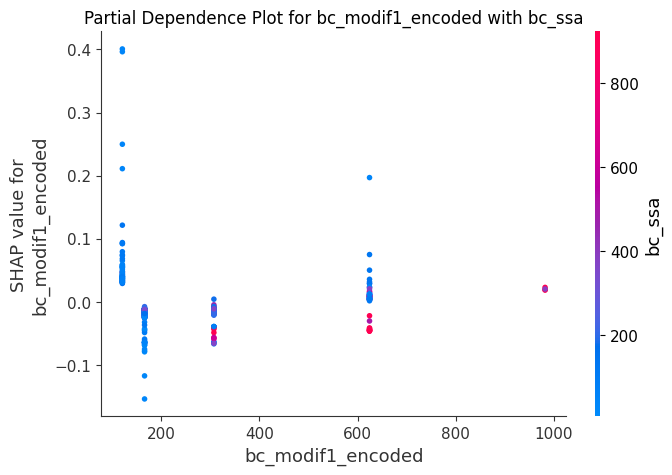

In [ ]:
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt

# Assuming 'scaler' is your StandardScaler instance
# Inverse transform the scaled data back to the original data
xtrain_original = scaler.inverse_transform(xtrain_scaled)

# Create an explainer
explainer = shap.Explainer(xgbr)

# Calculate SHAP values for the original (unscaled) data
# You should use the scaled data for this calculation
shap_values = explainer.shap_values(xtrain_scaled)

# Specify the feature for which you want to create a PDP
feature_of_interest = 'bc_modif1_encoded'
other_feature = 'bc_ssa'  # Change 'other_feature' to the desired feature

# Get the index of the features in the feature_names list
feature_index = features.index(feature_of_interest)
other_feature_index = features.index(other_feature)

# Set the color for the plot (e.g., 'blue', 'red', 'green', etc.)
line_color = 'red'

# Create the PDP with original (unscaled) data for feature values
shap.dependence_plot(
    ind=feature_index,
    shap_values=shap_values,
    features=xtrain_original,
    feature_names=features,
    interaction_index=other_feature_index,
    show=False
)
plt.title(f'Partial Dependence Plot for {feature_of_interest} with {other_feature}')
plt.show()
